if pixel value is greater than a threshold avlue, it is assinged one value, else it is assinged antoher value. the function used is cv2.threshold. 

first argumetn is the source image, which should be a grayscale image. second arugment is the threshold value which is used to classify the pixel values. the third argumetn is the maxVal which represents the value to be given if the pixel value is more than the threshold value. the fourth parameter gives the different type of threshold. 

- cv2.THRESH_BINARY
- cv2.THRESH_BINARY_INV
- cv2.THRESH_TRUNC
- cv2.THRESH_TOZERO
- cv2.THRESH_TOZERO_INV

two outputs are obtained for this transformation, one is the retval and the second is the thresholded image. 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

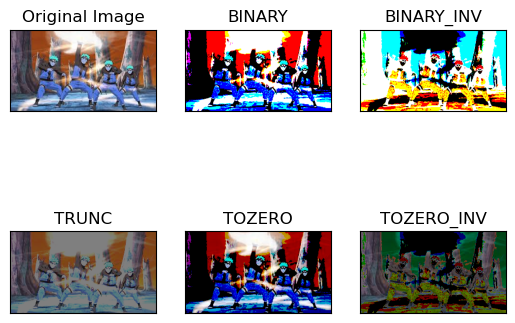

In [7]:
img = cv2.imread('./sample_imgs/rasenshuriken.jpeg')

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

## Adaptive thresholding

instead of giving a global threshold value which may not be good in all the conditions where image has different lighting conditions in different areas, in that case we go for adaptive thresholding. 

in this, the algorithm calculates the threshold for small regions of the image. so, we get diffeent thresholds for differnet regions of the same image and it gives us better results for images with varying illumination. 

**Adaptive method** - decides how the thresholding value is calculated.

-- cv2.ADAPTIVE_THRESH_MEAN_C :- threshold is the mean of the neighborhood area.

-- cv2.ADAPTIVE_THRESH_GAUSSIAN_C :- threshold value is the weighted sum of neighborhood values where weithts are a gaussian window. 

**Block size** - it decides the neighborhood area. 

**C** - it is jsut a cosntant which is subtracted from the mean or weighted sum calculated. 



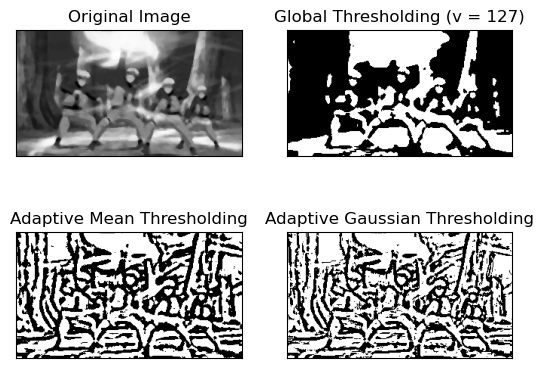

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./sample_imgs/rasenshuriken.jpeg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Otsu's binarization

in global thresholding we used an arbitary value for threshold value. but, how do we know if a value selected is good or not? the asnwer is trail and error method. 

but now, consider a bimodal image ( image whose histogram has two peaks), for that image we can take a value in the middle of the peaks. this is called Otsu binarization. IT automatically calculates the threshold vlaue from image histogram for a bimodal image. 

for threshold value just pass zero. the algorithm then finds the optimal threshold value and returns the secondo utput retval. if the Otsu thresholding is not used, retval is the same threshold value you used. 





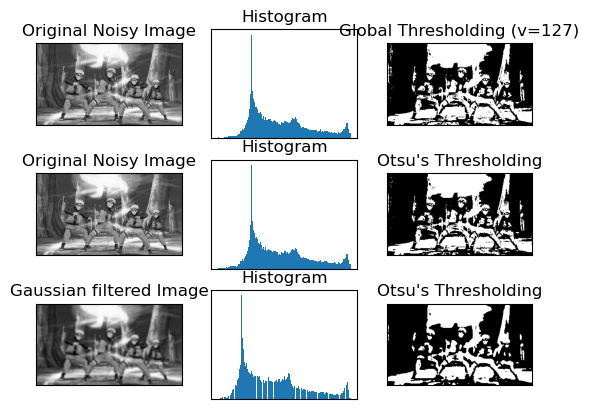

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./sample_imgs/rasenshuriken.jpeg',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()